<a href="https://colab.research.google.com/github/gdg-ml-team/ioExtended/blob/master/Lab_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#Learning Objectives:

    

*   Load and read data from **csv file**
*   Use Pandas library
*  Explore the data and check if there are null values
* Decide which column is the label column and check if it has discrete or continuous values
* Choose a Model
* Build, Train, and Evaluate Your Model

# Regression Example

> [Visual example](http://playground.tensorflow.org/#activation=linear&batchSize=10&dataset=gauss&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=2,1&seed=0.38918&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=regression&initZero=false&hideText=false)




Please download the dataset  from [Dataset download link](https://drive.google.com/open?id=1utkLWLMg3lPr_7otetfn06HXAq5mGQmv)



###Import libraries




In [0]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

### Upload the dataset

In [2]:
from google.colab import files
uploaded = files.upload()

Saving kc_house_data.csv to kc_house_data.csv


###Load the dataset

In [0]:
df = pd.read_csv('kc_house_data.csv')

##Data Exploration

In [4]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [6]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

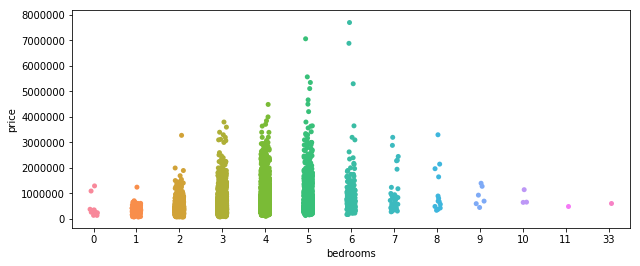

In [7]:

plt.figure(figsize=(10, 4))
sb.stripplot(x="bedrooms", y="price", data=df);

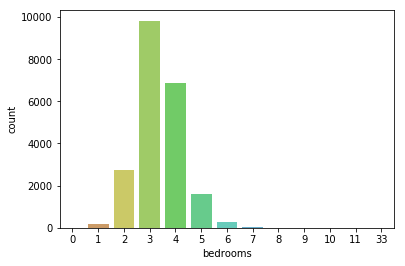

In [8]:
sb.countplot(x='bedrooms',data=df, palette='hls')

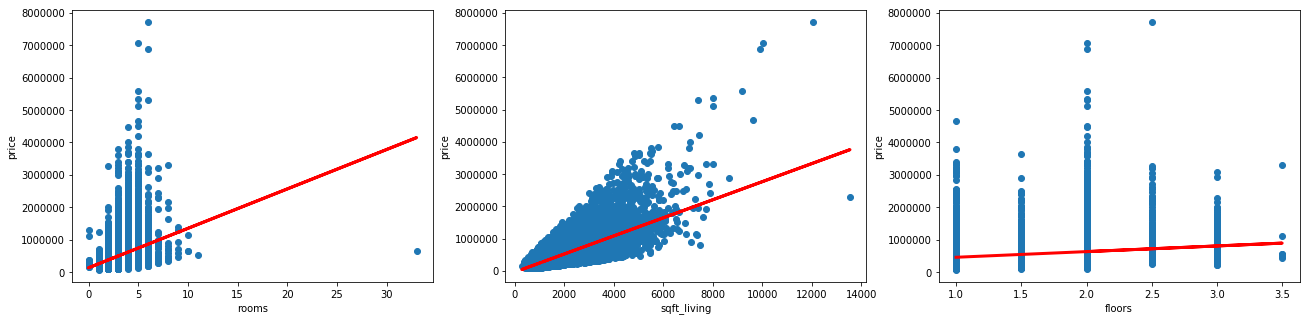

In [9]:
plt.figure(figsize=(22,5))

plt.subplot(131)#subplot to add a subplot to the current figure
plt.scatter(df['bedrooms'], df['price']) # show data as scatter plot of y vs x
plt.xlabel('rooms') #Set the label for the x-axis
plt.ylabel('price') #Set the label for the y-axis
m,b = np.polyfit(df['bedrooms'], df['price'],1) #To find m and b for (y = mx+b)
plt.plot(df['bedrooms'],m * df['bedrooms']+b, lw=3, color='red') # To draw the line..notice df['bedrooms']= x , m*df['bedrooms']+b = y
          
plt.subplot(132)
plt.scatter(df['sqft_living'], df['price'])
plt.xlabel('sqft_living')
plt.ylabel('price')
m,b = np.polyfit(df['sqft_living'], df['price'],1)
plt.plot(df['sqft_living'],m * df['sqft_living']+ b, lw=3, color='red')
          
                    
plt.subplot(133)
plt.scatter(df['floors'], df['price'])
plt.xlabel('floors')  
plt.ylabel('price')  
m,b = np.polyfit(df['floors'], df['price'],1)
plt.plot(df['floors'],m * df['floors']+ b , lw=3, color='red')
          
plt.show()  #Display a figure
          

In [10]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [11]:
print('max price : ', df['price'].max())
print('min price : ', df['price'].min())
print('mean price :',df['price'].mean())

max price :  7700000.0
min price :  75000.0
mean price : 540088.1417665294


##Select features

In [12]:
df = df.drop(['id','date', 'lat', 'long','zipcode'], axis =1)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,1800,7503




##Choose the algorithm that you think it is the right



1. **Input data**

In [0]:
columns = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade','sqft_above', 'sqft_basement', 'yr_built','yr_renovated', 'sqft_living15', 'sqft_lot15']
labels = df['price'].values
features = df[list(columns)].values

2. **Spilt data**

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.30)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(15129, 15) (6484, 15) (15129,) (6484,)



   3. **Bulid a Model**


In [15]:
# Bulid a Model

model = tf.keras.Sequential([tf.keras.layers.Dense(20, input_dim=15, activation='relu'),
                             tf.keras.layers.Dense(1, activation="linear")]) 

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the Model
history = model.fit(X_train, y_train, epochs=50, verbose=False)# later let epochs=1000 or more than 1000 and see if that impact on the result

# Evaluate
model.evaluate(X_test, y_test)



6484/6484 [==============================] - 0s 22us/sample - loss: 65179058696.5281


65179058696.52807

In [16]:
# Predict 
predict1 = model.predict(X_test)
print ("Predicted price : ", predict1[7])
print ("Real price : ", y_test[7])

Predicted price :  [301865.25]
Real price :  425000.0


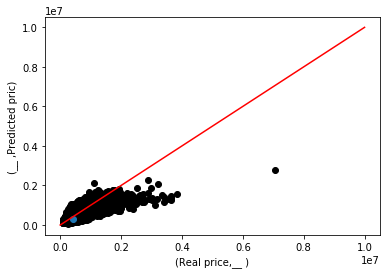

In [17]:
# visualization
plt.scatter(y_test, predict1,  color='black')
plt.scatter(y_test[7], predict1[7])
plt.xlabel('(Real price,__ )')
plt.ylabel('(__ ,Predicted pric)')
plt.plot([0, 10000000], [0, 10000000], color='red')

## Let us try another algorithm 

In [18]:
from sklearn import linear_model

# Bulid a new Model
regression = linear_model.LinearRegression()

# Train the Model
regression.fit(X_train, y_train)

# Evaluatet
Accuracy = regression.score(X_train, y_train)
print ("Accuracy of the training : ", Accuracy*100)

accuracy = regression.score(X_test, y_test)
print ("Accuracy of the testing : ", accuracy*100)



Accuracy of the training :  64.8663235357204
Accuracy of the testing :  66.46389603848816


In [19]:
# Predict
predict2 = regression.predict(X_test)
print ("Predicted price :", predict2[7])
print ("Real price :", y_test[7])

Predicted price : 311306.59566389397
Real price : 425000.0


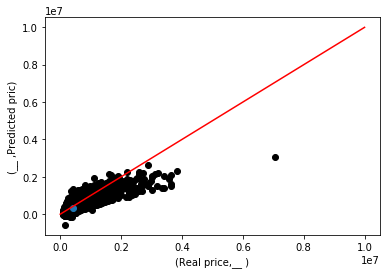

In [20]:
# visualization
plt.scatter(y_test, predict2,  color='black')
plt.scatter(y_test[7], predict2[7])
plt.xlabel('(Real price,__ )')
plt.ylabel('(__ ,Predicted pric)')
plt.plot([0, 10000000], [0, 10000000], color='red')


#Exercises

Reset All runtimes before you start doing your exercises

   >  **Runtime >> Reset All runtimes**



Please **download** the dataset  from  [download link](https://www.kaggle.com/mylesoneill/world-university-rankings/downloads/world-university-rankings.zip/3#timesData.csv) then unzip the folder

In [0]:
'''
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

# Load the dataset that already downloaded it from the link 
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('timesData.csv')

# TODO : show the first 10 rows 

# TODO : show if there are any null values

# TODO : show the information about the dataset

# TODO : choose 2 columns and show them as a graph

# TODO : drop some columns that you think you don't need them
'''